<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/GeekBrains/algorithms/web2/Lesson_2_extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

**План занятия**

* [Теоретическая часть](#theory)
    * [Масштабирование признаков](#0)
    * [Стохастический градиентный спуск](#1)
    * [SGD своими руками](#sgd_manual)
    * [Переобучение](#overfit)
    * [Методы борьбы с переобучением](#methods)
        * [Регуляризация](#reg)
* [Практическая часть](#practice)
    * [Домашнее задание](#hw)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

## Масштабирование признаков <a class='anchor' id='0'>

В машинном обучении при работе с линейными моделями полезной является практика _масштабирования признаков_. Многие методы машинного обучения, в том числе и линейные, наиболее эффективны в том случае, когда признаки имеют одинаковый масштаб. По сути масштабирование означает приведение признаков к какой-то единой шкале. 

Существует большое количество методов масштабирования, наиболее популярными из которых являются _нормализация_ и _стандартизация_.

Метод **нормализации** заколючается в приведении признаков к масштабу в диапазоне [0-1].

Для его реализации необходимо найти минимальное $min_{j} (x^{j}_{i})$ и максимальное $max_{j} (x^{j}_{i})$ значение признака на обучающей выборке. При этом отмасштабированное значение признака будет находиться по формуле

$$x^{j}_{i} = \frac{x^{j}_{i} - min_{j} (x^{j}_{i})}{max_{j} (x^{j}_{i})-min_{j} (x^{j}_{i})}.$$

После преобразования значений признаков минимальное значение превратится в 0, а максимальное - в 1.

Пример различия в сходимости алгоритма на сырых и нормализованных данных:
<img src="https://github.com/vinalyan/diff/blob/master/GeekBrains/algorithms/web2/images/L2_normalization.png?raw=1" style="width: 500px;">

**Стандартизация** заключается в получении своего рода значения сдвига каждого признака от среднего. Для ее реализации необходимо вычислить среднее значение признака 

$$\mu_{j} = \frac{1}{l}\sum^{l}_{i=1}x^{j}_{i}$$

и стандартное отклонение, которое находится путем суммирования квадратов отклонения значений признака на объектах выборки от среднего $\mu_{j}$ и делением на число объектов выборки с последующим извлечением корня:

$$\sigma_{j} = \sqrt{\frac{1}{l}\sum^{l}_{i=1}(x^{j}_{i}-\mu_{j})^{2}}$$

Чтобы отмасштабировать признак, каждое его значение преобразуется по формуле

$$x^{j}_{i}=\frac{x^{j}_{i} - \mu_{j}}{\sigma_{j}}.$$

Масштабирование является важным этапом подготовки данных перед применением методов машинного обучения. 

Важным и последним свойством масштабирования является факт, что после масштабирования признаков в линейных моделях веса при них могут интерпретироваться как мера значимости этих признаков.

Существуют различные ситуации, когда целесообразно применять тот или иной метод масштабирования. Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние (knn, k-means). Стандартизировать полезно признаки для модели, которая опирается на распределение (линейные модели). В общем случае, когда выбор метода неочевиден, полезной практикой считается создавать масштабированные копии набора данных, с которыми работает специалист, и сравнивать друг с другом полученные после применения модели результаты для выявления оптимального метода масштабирования для имеющейся ситуации.

## Стохастический градиентный спуск <a class='anchor' id='1'>

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


Вспомним метод градиентного спуска, рассмотренный ранее.

На каждой итерации приближение получается вычитанием из предыдущего вектора градиента, умноженного на некоторый шаг:


$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

При этом выражение градиента в матричной форме выглядит так:

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

Если расписать $j$-ю компонетну этого градиента, то получим

$$\frac{\partial Q}{\partial w_{j}} = \frac{2}{l}\sum^{l}_{i=1}x^{j}_{i}(\left \langle w,x_{i} \right \rangle - y_{i}),$$

то есть суммирование по всем $l$ объектам обучающей выборки. Здесь выражение под суммой показывает, как нужно изменить $j$-й вес, чтобы как можно сильнее улучшить качество __на объекте $x_{i}$__, а вся сумма показывает, как нужно изменить вес, чтобы улучшить качество на __всей выборке__.

В этой формуле отражен один из главных недостатков градиентного спуска: если выборка большая по объему, то даже один шаг градиентного спуска будет занимать много вычислительных ресурсов и времени.

Стремление к оптимизации процесса привело к появлению _стохастического градиентного спуска_ (Stochastic gradient descent, SGD). Идея его основана на том, что на одной итерации мы вычитаем не вектор градиента, вычисленный по всей выборке, а вместо этого случайно выбираем один объект из обучающей выборки $x_{i}$ и вычисляем градиент только на этом объекте, то есть градиент только одного слагаемого в функционале ошибки и вычитаем именно этот градиент из текущего приближения вектора весов:

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, \{x_{i}\}),$$

то есть $\nabla Q(w^{k-1}, X)$ заменяется на $\nabla Q(w^{k-1}, \{x_{i}\})$.

Если в случае градиентного спуска мы стараемся на каждой итерации уменьшить ошибку на всей выборке, и по мере увеличения числа итераций ошибка падает монотонно, то в случае стохастического градиентного спуска мы уменьшаем на каждой итерации ошибку только на одном объекте, но при этом есть вероятность увеличить ее на другом объекте, поэтому график изменения ошибки может получаться немонотонным, и даже иметь пики (см. пример по ссылке [1] из списка литературы). То есть на какой-то итерации мы можем даже увеличить ошибку, но при этом в целом по ходу метода ошибка снижается, и рано или поздно мы выходим на нормальный уровень.

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * Выбираем случайные объект $x_{i}$ из X
    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, \{x_{i}\})$
    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


<img src="https://github.com/vinalyan/diff/blob/master/GeekBrains/algorithms/web2/images/compare_gd_sgd.png?raw=1" width=550px>

## SGD своими руками<a class="anchor" id="sgd_manual"></a>

Реализуем стохастический градиентный спуск своими руками.

In [129]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [136]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[  3.78794466,  -0.61837549],
       [ -6.52931145,  -1.06706712],
       [-10.6581629 ,  -0.34682333],
       ...,
       [ 11.94510163,   1.00147133],
       [  1.25623099,   0.35261274],
       [ -0.5674652 ,   0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

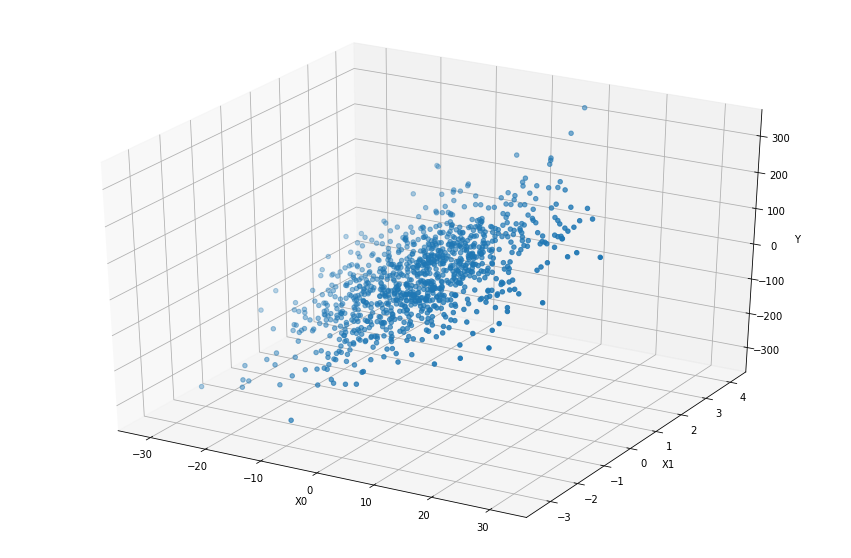

In [131]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

Отмасштабируем получившиеся признаки методом стандартизации.

In [149]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis = 0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)


array([-2.40328590e-17,  9.54791801e-18])

array([1., 1.])

In [150]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [151]:
X

array([[ 0.46447924, -0.64462559],
       [-0.58228272, -1.09738549],
       [-1.00118525, -0.3706113 ],
       ...,
       [ 1.29208317,  0.98990825],
       [ 0.20761816,  0.33516651],
       [ 0.02259069,  0.39523966]])

In [154]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-2.74745504e-17,  1.03805853e-17])

array([1., 1.])

In [155]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Подготовка данных и средств проверки закончена. Далее реализуем сам стохастический градиентный спуск.

In [87]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y.shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    if weight_dist < min_weight_dist:
        print('bbb', new_w, w)
    error = mserror(X, new_w, Y)
     
    w_list.append(new_w.copy())
    errors.append(error)
    
    if iter_num % 1000 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [-0.00087705  0.00116866], MSE = 8190.67
Iteration #1000: W_new = [1.23448526 1.34145334], MSE = 7868.75
Iteration #2000: W_new = [2.48181208 2.67997377], MSE = 7552.18
Iteration #3000: W_new = [3.6364344  3.96042664], MSE = 7259.79
Iteration #4000: W_new = [4.78131928 5.20351319], MSE = 6978.84
Iteration #5000: W_new = [5.91635587 6.39140102], MSE = 6711.15
Iteration #6000: W_new = [6.99218888 7.49400424], MSE = 6465.02
Iteration #7000: W_new = [8.19692721 8.74112411], MSE = 6193.48
Iteration #8000: W_new = [9.21034798 9.94441368], MSE = 5952.16
Iteration #9000: W_new = [10.16370382 10.98773619], MSE = 5739.38
Iteration #10000: W_new = [11.10313359 12.10481093], MSE = 5523.84
Iteration #11000: W_new = [11.97923852 13.1526246 ], MSE = 5325.93
Iteration #12000: W_new = [12.90608662 14.17852011], MSE = 5129.16
Iteration #13000: W_new = [13.79861221 15.26127585], MSE = 4933.48
Iteration #14000: W_new = [14.7231593  16.32183371], MSE = 4740.95
Iteration #15000: W_new 

Для стохастического градиентного спуска мы увеличили максимальное число итераций (max_iter) до 10000, что естественно, так как из-за специфики метода для достижения сходимости нужно большее количество шагов.

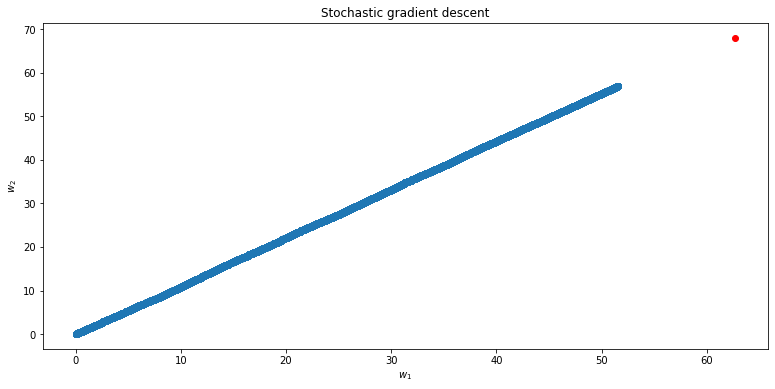

In [88]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

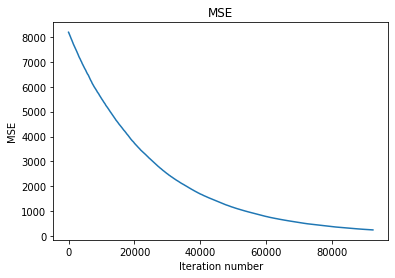

In [89]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Как и в случае градиентного спуска, вектор весов приближается к истинному. При этом падает и ошибка.

Добиться лучшей скорости сходимости в методе стохастического градиентного спуска можно варьируя величину шага или используя методы, подбирающие ее адаптивно.

Среди преимуществ SGD можно выделить гораздо более быстрое вычисление одного шага по сравнению с обычным градиентным спуском и отсутствие необходимости хранить всю выборку в памяти при работе метода, что в свою очередь позволяет работать с очень большими выборками, которые невозможно поместить в память.

## Переобучение <a class='anchor' id='overfit'>

Чтобы понять смысл переобучения и недообучения, начнем с примера. Допустим, у нас есть исходная известная зависимость 3-го порядка:

$$f(x) = 0.6 - 13.2x - 5.3 x^{2} - 4.17x^{3}.$$

Реализуем ее в виде python-функции и построим график.

In [71]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3

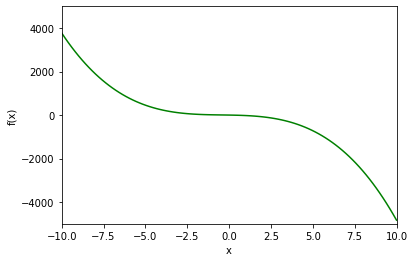

In [72]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g');

Теперь сгенерируем датасет из десяти случайных точек, подчиняющихся этой зависимости, с добавлением шума и нанесем на график.

In [73]:
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

In [74]:
x_data

array([-5.53417842,  0.46326683,  1.01402913, -9.087961  , -2.78542329,
       -5.53838117,  3.77452324, -6.7253715 , -8.59350266,  8.8202172 ])

In [75]:
f_data

array([  745.4884675 ,  -851.08250932,   422.69810766,  2129.66866668,
        -413.07267878,   206.52054624,    44.24369404,  1046.66448866,
        1799.10906399, -3495.863552  ])

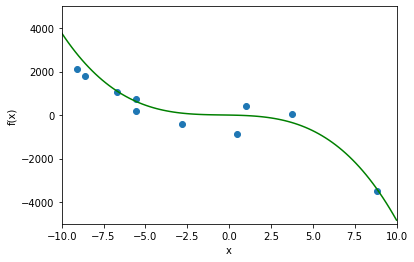

In [93]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data);

Теперь попробуем создать модель, способную восстановить исходную зависимость. Самым примитивным так называемый __константный алгоритм__, то есть модель вида 

$$a(x) = w_{0}.$$

Зависимость такой модели от признаков будет иметь вид горизонтальной прямой, что, очевидно, не обобщает нашу зависимость в должном виде (см. график ниже).

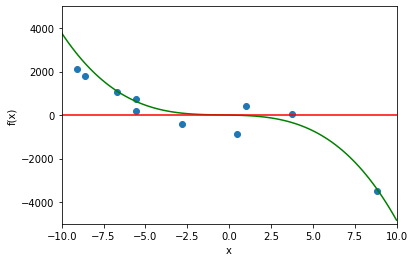

In [94]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, [dots.mean()]*len(dots), color='r');

Далее усложним семейство алгоритмов, применив линейную регрессию, которая в случае одного признака будет иметь вид 

$$a(x) = w_{0} + w_{1}x.$$

Обучим соответствующую модель, применив для этого методы python "из коробки" для работы с линейной регрессией.

In [95]:
from sklearn.linear_model import LinearRegression

# создадим модель
linear_regressor = LinearRegression()

# обучим ее
linear_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
# выведем полученный вес при признаке и свободный коэффициент
print(linear_regressor.coef_[0], linear_regressor.intercept_)

-237.82400777158773 -411.9249993231067


Нанесем полученную после обучения модель на график

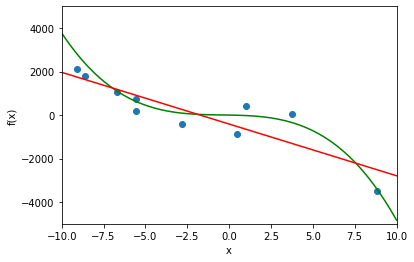

In [97]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, linear_regressor.predict(np.reshape(dots, (-1, 1))), color='r');

Мы обучили линейную модель, и видимо, что она, как и константная, плохо восстанавливает исходную зависимость. В данном случае можно говорить о __недообучении__. Хороший алгоритм не был построен, поскольку с помощью выбранного семейства алгоритмов невозможно восстановить исходную закономерность.

Усложним используемое семейство алгоритмов до кубической зависимости 

$$a(x) = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}x^{3}.$$

Сделаем это путем искусственной генерации новой матрицы признаков, состоящей из исходных $x$, возведенных в степени до 3, используя `sklearn.preprocessing.PolynomialFeatures`. 

Из [статьи](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) про PolynomialFeatures:

For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd

In [99]:
a = pd.DataFrame([[2, 3, 4]], columns=['a', 'b', 'c'])

In [100]:
a

,a,b,c
0,2,3,4


In [101]:
PolynomialFeatures(degree=2).fit_transform(a)

array([[ 1.,  2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [102]:
# x_data
# x_data[0]**0, x_data[0]**1, x_data[0]**2, x_data[0]**3

In [103]:
# PolynomialFeatures(degree=3).fit_transform(x_data.reshape(-1, 1))

In [104]:
# создадим новую кубическую модель
third_degree_regressor = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# обучим ее
third_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [105]:
# выведем полученные веса при признаках и свободный коэффициент
print(third_degree_regressor.named_steps.linearregression.coef_)
print(third_degree_regressor.named_steps.linearregression.intercept_)

[ 0.         21.09882775 -7.90436131 -4.26313079]
-55.952650937063254


Нанесем полученную в итоге зависимость на график.

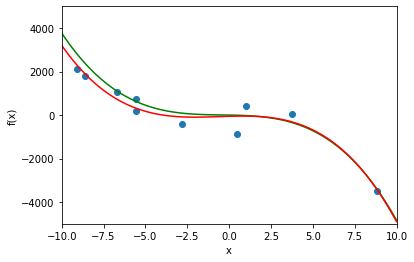

In [106]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, third_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r');

Полученный алгоритм достаточно хорошо описывает данные, но не идеально. И в реальных условиях может возникнуть вопрос, можно ли добиться лучшего совпадения увеличением сложности алгоритма.

Проиллюстрируем, что происходит в случае использования многочлена 8-й степени.

In [159]:
# создадим модель 8-й степени
eighth_degree_regressor = make_pipeline(PolynomialFeatures(degree=8), LinearRegression())

# обучим ее
eighth_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=8, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Покажем получившийся график зависимости.

In [160]:
# выведем полученные веса при признаках и свободный коэффициент
print(eighth_degree_regressor.named_steps.linearregression.coef_)
print(eighth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116178e+03  8.76325215e+02  4.03130196e+01
 -5.61701732e+01 -9.81320836e+00  9.56286199e-02  1.16554743e-01
  6.21060019e-03]
-1536.7939068780252


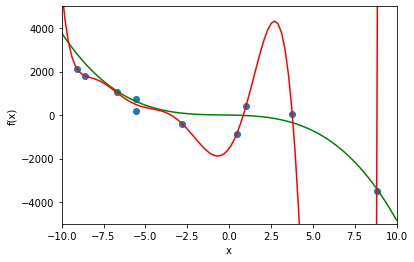

In [161]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, eighth_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r');

## Методы борьбы с переобучением <a class='anchor' id='methods'>

Видно, что новая модель лучше описывает имеющиеся в обучающей выборке данные и дает фактически идеальные ответы на них, но про этом в целом зависимость сильно отличается от истинной. Поэтому если мы попробуем применить эту модель на новых данных, ответы будут расходиться с правильными. Такое явление и называется __переобучением__. Алгоритм слишком сильно подогнан под обучающую выборку, и за счет этого будет давать неадекватные ответы на новых точках.

Таким образом, недообучение несет за собой плохое качество на обучении и на новых данных, а переобучение - хорошее качество на обучении и плохое на новых данных.

Понятно, как бороться с недообучением - усложнять семейство алгоритмов. Возникает вопрос, как выявить переобучение и его избежать. В случае переобучения, как было сказано ранее, данные из обучающей выборки алгоритмом будут описываться хорошо, а новые данные - плохо, поэтому используя только обучающую выборку, невозможно заключить, хорошо обучен алгоритм или переобучен, так как оба они будут хорошо описывать известные данные.

Есть несколько методов оценки качества алгоритма и выявления переобучения:

1. Не использовать всю выборку для обучения, а откладывать часть данных для проверки полученного алгоритма. Это называется **отложенной выборкой**. Данные делятся на обучающую и тестовую выборку в соотношении, например, 0.7 к 0.3, и затем на первой части алгоритм обучается, а на второй проверяется. Размер отложенной выборки в данном случае нужно подбирать с осторожностью, так как слишком маленькая тестовая выборка не будет обеспечивать должной точности оценки качества обучения, а слишком маленькия обучающая выборка приведет к снижению качества обучения, так как будет малорепрезентативна. Таким образом, главный минус этого метода - сильная зависимость результата от того, как мы выбираем отложенную выборку. Например, в пространстве объектов могут быть какие-то особые, отличающиеся от остальных по какому-то свойству объекты, и может так произойти, что после разбиения они не попадут в обучающую выборку, алгоритм на них не обучится, и качество обучения после проверки на этих объектах, попавших в тестовую выборку, будет плохим. Один из путей решения этой проблемы - многократное случайное разбиение выборки на тестовую и обучающую и использование в качестве оценки качества среднего значения ошибки полученной после каждого разбиения. Но и этот метод не гарантирует, что каждый объект побывает в обучающей выборке, так как разбиения случайные.
<img src="https://github.com/vinalyan/diff/blob/master/GeekBrains/algorithms/web2/images/valid.png?raw=1" style="width: 500px;">


2. **Кросс-валидация** (усложненная версия метода отложенной выборки). Этот метод как раз вытекает из проблемы, описанной выше. Он является более системным подходом. В этом случае выборка разбивается на $k$ блоков, и затем каждый из них по очереди используется в качестве тестового, а остальная часть - в качестве обучающей выборки. После прохождения всей выборки таким образом получается $k$ показателей качества, и итоговая оценка качества обучения по кросс-валидации оценивается как средняя из этих $k$. В этом случае мы гарантируем, что все данные поучаствуют в обучении. Выбор количества блоков $k$ обычно зависит от размера выборки. Чем больше данных, тем меньше нужно блоков, так как во-первых в этом случае после разбиения даже на малое количество блоков у нас остается большой объем данных в обучающей выборке, что обеспечивает хорошее качество обучения, а во-вторых, разбиение на $k$ блоков означает обучение алгоритма $k$ раз, соответственно, чем их больше, тем больше получается вычислительная сложность процесса обучения модели. Обычно $k$ принимает значение от 3 до 10.
<img src="https://github.com/vinalyan/diff/blob/master/GeekBrains/algorithms/web2/images/kfolds.png?raw=1" style="width: 500px;">


3. Использовать **меры сложности модели**, позволяющие без дополнительной выборки выявить переобучение.

Одним из знаков, что произошло переобучение модели, или _мерой сложности_ является получение больших по модулю весов при признаках. Посмотрим, что получилось в нашей последней модели.

In [162]:
# выведем полученные веса при признаках и свободный коэффициент
print(eighth_degree_regressor.named_steps.linearregression.coef_)
print(eighth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116178e+03  8.76325215e+02  4.03130196e+01
 -5.61701732e+01 -9.81320836e+00  9.56286199e-02  1.16554743e-01
  6.21060019e-03]
-1536.7939068780252


Видим веса 2 и 3 порядков в то время как в кубичесой модели и в исходной зависимости ничего подобного не было. Это и говорит нам о том, что в данном случае имеет место переобучение.

На этой особенности и основывается метод _регуляризации_ для борьбы с переобучением.

### Регуляризация <a class='anchor' id='reg'>

#### $L_2$-регуляризация (ridge, регуляризация Тихонова)

Метод регуляризации заключается в "штрафовании" модели за слишком большие веса путем добавления нового члена к ошибке:

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

добавленный член $\lambda ||w||^{2}$ - **квадратичный регуляризатор**, который представляет собой $L_{2}$-норму вектора весов, то есть сумму квадратов весов $\sum^{d}_{j=1}w_{j}^{2}$, коэффициент $\lambda$ при нем - коэффициент регуляризации. Чем больше его значение, тем меньшая сложность модели будет получаться в процессе такого обучения. Если _увеличивать_ его, в какой-то момент оптимальным для модели окажется зануление всех весов. В то же время при слишком _низких_ его значениях появляется вероятность чрезмерного усложнения модели и переобучения. Выбор оптимального значения этого коэфициента является отдельной задачей и заключается в многократном обучении модели с разными его значениями и сравнении их качества.

По сути, смысл регуляризации заключается, как и в обычном обучении, в минимизации функционала ошибки, только в данном случае добавляется условие непревышения нормой вектора весов некоторого значения $||w||^{2}\leq C$, то есть ограничение весов, что и будет залогом избежания переобучения.

$$\begin{cases} Q(w, X) \rightarrow min \\ ||w||^2 \leq C \end{cases}$$

In [163]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

На графике ниже изображено изменение весов признаков при увеличении коэффициента регуляризации `alpha` от $10^{-3}$ до $100$ для модели `Ridge` (L2-регуляризация). Чем больше значение `alpha`, тем сильнее регуляризация и тем сильнее модель "штрафует" за большие значения весов, они убывают плавно и примерно одновременно друг с другом.


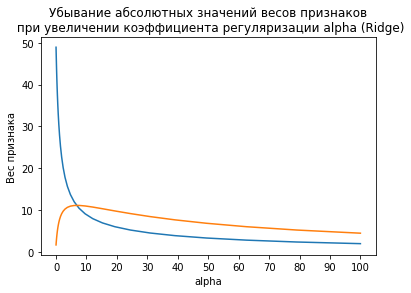

In [164]:
from sklearn.linear_model import Ridge

n = 50

train_amount = 5
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

In [171]:
alpha_list

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

Коэффициент регуляризации: 0.35564803062231287
Веса: [39.29323873  4.54660362]
MSE на обучении: 45.56174288108137
MSE на тесте: 76.44455769106492


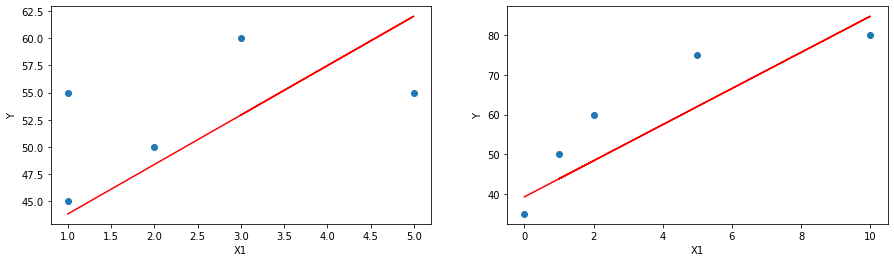

In [113]:
index = 25

coef = coeffs[index]

print(f'Коэффициент регуляризации: {alpha_list[index]}')
print(f'Веса: {coef}')

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs

ax1.scatter(train_X[:, 1], train_y)

y_pred = np.dot(train_X, coef)
ax1.plot(train_X[:, 1], y_pred, c='r')

ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
print(f'MSE на обучении: {np.mean((y_pred - train_y)**2)}')

ax2.scatter(test_X[:, 1], test_y)

y_pred = np.dot(test_X, coef)
ax2.plot(test_X[:, 1], y_pred, c='r')

ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
print(f'MSE на тесте: {np.mean((y_pred - test_y)**2)}')
plt.show()

#### $L_1$-регуляризация (lasso, регуляризация через манхэттенское расстояние)

Описанный выше метод с использованием $L_{2}$-нормы вектора весов в качестве регуляризатора называется **$L_{2}$-регуляризацией**. По аналогии существует также **$L_{1}$-регуляризация**, использующая в качестве регуляризатора $L_{1}$-норму вектора весов, то есть сумму модулей весов.

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

На графике ниже изображено изменение весов признаков при увеличении коэффициента регуляризации `alpha` от $10^{-3}$ до $100$ для модели `Lasso` (L1-регуляризация). Чем больше значение `alpha`, тем сильнее регуляризация и тем сильнее модель "штрафует" за большую абсолютную величину признаков. 

Такой метод часто используется для отбора признаков: у менее ценных признаков гораздо раньше обнуляются веса.

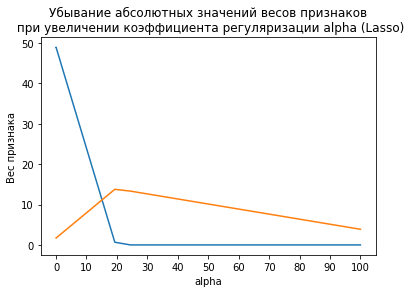

In [114]:
from sklearn.linear_model import Lasso

n = 50

coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val, fit_intercept=False)
    lasso.fit(train_X, train_y)
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

Коэффициент регуляризации: 3.7275937203149416
Веса: [39.61933896  4.0232491 ]
MSE на обучении: 45.55574735307548
MSE на тесте: 89.38217775478338


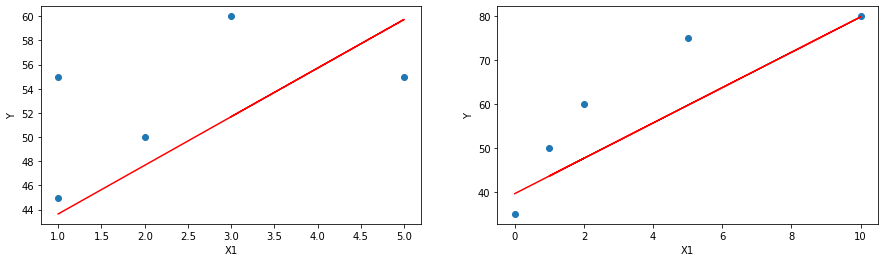

In [115]:
index = 35

coef = coeffs[index]

print(f'Коэффициент регуляризации: {alpha_list[index]}')
print(f'Веса: {coef}')

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs

ax1.scatter(train_X[:, 1], train_y)

y_pred = np.dot(train_X, coef)
ax1.plot(train_X[:, 1], y_pred, c='r')

ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
print(f'MSE на обучении: {np.mean((y_pred - train_y)**2)}')

ax2.scatter(test_X[:, 1], test_y)

y_pred = np.dot(test_X, coef)
ax2.plot(test_X[:, 1], y_pred, c='r')

ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
print(f'MSE на тесте: {np.mean((y_pred - test_y)**2)}')
plt.show()

#### Сравнение

$L_{2}$-регуляризатор:
* непрерывная гладкая функция
* штрафует модель за сложность

$L_{1}$-регуляризатор:
* негладкая функция
* занулении некоторых весов (отбор признаков)

Регуляризация создает некое абстрактное поле (зеленое) в градиентном спуске (овалы), из которого не может выйти обучение модели. Если мы увеличиваем Лямбду, то поле сужается.

<img src='https://github.com/vinalyan/diff/blob/master/GeekBrains/algorithms/web2/images/compare_l1_l2_2.png?raw=1'>

Можно применить одновременно L1 и L2 регуляризацию - это называется Elastic Net. Про это можно посмотреть [здесь](https://youtu.be/1dKRdX9bfIo) и почитать в оригинальной [статье](https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf).

### Коэффициент детерминации

_Коэффициент детерминации_ $R^{2}$ является еще одной метрикой качества в задачах регрессии. Ранее мы говорили о средней абсолютной и среднеквадратичной ошибке. Коэффициент детерминации позволяет развить тему среднеквадратичной ошибки, интерпретируя ее. 

MSE не позволяет сама по себе сделать вывод о том, как хорошо модель решает задачу. Например, если целевая переманная принимает значения от 0 до 1, а MSE равняется 10, это плохой показатель, а когда целевая переменная варьируется от 1000 до 10000, такое же значение уже является очень хорошим. Для избавления от такой неясности и был введен коэффициент детерминации, который по сути является нормированной среднеквадратичной ошибкой и принимает значения от 0 до 1.

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{l}_{i=1}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{l}_{i=1}{(y - \bar{y})^2}}$$

где $\bar{y}=\frac{1}{l}\sum^{l}_{i=1}y_{i}$ - среднее значение целевой переменной.

Коэффициент детерминации характеризует, какую долю дисперсии ответов объясняет модель. Если $R^{2}=1$, то модель идеально описывает данные, если же $R^{2}$ близко к нулю, то предсказания сопоставимы по качеству с константной моделью.

In [116]:
true = np.array([0, 0.2, 0.1, 0.6, 0.3, 0.9, 0.7])
pred = np.array([0.1, 0.3, 0.2, 0.7, 0.5, 0.5, 0.5])

np.mean((true - pred)**2)

0.04

In [117]:
true = np.array([100, 20, 10, 60, 30, 90, 70])
pred = np.array([110, 30, 20, 70, 50, 50, 50])

np.mean((true - pred)**2)

400.0

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [118]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика

In [178]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [179]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [180]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [181]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [182]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [183]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [184]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

Стандартизация

3.0


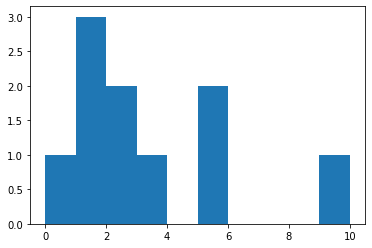

In [185]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


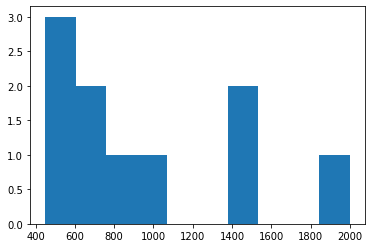

In [186]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [187]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [188]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

4.4408920985006264e-17


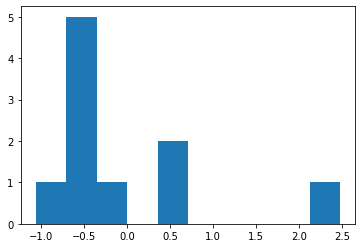

In [189]:
print(np.mean(X_st[:, 1]))
plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17


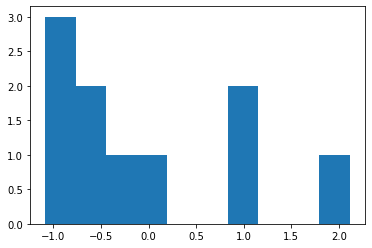

In [190]:
print(np.mean(X_st[:, 2]))
plt.hist(X_st[:, 2])
plt.show()

SGD (Stochastic gradient descent)

In [193]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [194]:
W = np.random.randn(X.shape[1])
W

array([ 0.04452171, -0.18359115,  0.7581856 , -0.84341361])

In [195]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [196]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [-0.54436225  1.92388418 -0.1250787   3.35316274], error 3239.8302386102155
Iter: 500, weights: [21.77826802  5.27354449 -7.70528204 20.05881604], error 42.267025581961306
Iter: 1000, weights: [26.93662603  6.09848058 -6.42017402 17.13531129], error 34.62101109716393
Iter: 1500, weights: [30.68834171  6.20864875 -4.98991564 14.99304373], error 30.44480378196416
Iter: 2000, weights: [33.50670624  6.23806606 -3.86150466 13.38198896], error 28.064725241538856
Iter: 2500, weights: [35.63368853  6.25464249 -3.00421715 12.16596383], error 26.707147596432282
Iter: 3000, weights: [37.23992396  6.26657023 -2.35622119 11.24763761], error 25.932783707462608
Iter: 3500, weights: [38.45301455  6.27551659 -1.86676715 10.55408042], error 25.491085494666166
Iter: 4000, weights: [39.36919842  6.28226682 -1.49710154 10.03027274], error 25.239140233349012
Iter: 4500, weights: [40.06114537  6.28736425 -1.21791127  9.63466749], error 25.095430313615285
Final MSE: 25.013457979934714


array([40.58283214,  6.29120733, -1.00741838,  9.3364047 ])

In [197]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)

            dQ = 2/n * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [157]:
stohastic_gradient_descent(X_st, y, iterations=50000, batch_size=4, eta=1e-2)

amount of batches is 3
Iter: 0, weights: [ 0.46730177 -0.36466559 -0.36293798  0.9687271 ], error 2888.0601052691763
Iter: 5000, weights: [40.67933572  6.28998318 -0.96090391  9.29595524], error 10.71367163921919
Iter: 10000, weights: [42.10438081  6.3004618  -0.38691636  8.48091973], error 11.35384753074138
Iter: 15000, weights: [42.19014909  6.30109247 -0.35237013  8.4318657 ], error 11.393437012290736
Iter: 20000, weights: [42.19531117  6.30113042 -0.35029092  8.42891332], error 11.395823597709384
Iter: 25000, weights: [42.19562186  6.30113271 -0.35016578  8.42873563], error 11.395967251518348
Iter: 30000, weights: [42.19564056  6.30113285 -0.35015825  8.42872493], error 11.395975897569626
Iter: 35000, weights: [42.19564169  6.30113285 -0.35015779  8.42872429], error 11.39597641794419
Iter: 40000, weights: [42.19564175  6.30113285 -0.35015777  8.42872425], error 11.39597644926382
Iter: 45000, weights: [42.19564176  6.30113285 -0.35015776  8.42872425], error 11.395976451148698
Final 

array([42.19564176,  6.30113285, -0.35015776,  8.42872425])

In [ ]:
##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$
Про производную можно посмотреть [здесь](https://youtu.be/dHhYHGI9E6I).

In [ ]:
##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = \lambda w $$

1

In [449]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8, log = False):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0 and log == True:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if log == True:
      print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, err

In [450]:
W, mse = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4, log = True)

Iter: 0, weights: [ 0.84385697 -0.88835384 -1.34947871  3.09476078], error 3229.301445179613
Iter: 500, weights: [22.10815807  5.09067985 -7.33957876 19.82111167], error 41.757436111329675
Iter: 1000, weights: [26.83076052  5.92124758 -6.23923733 17.14702882], error 34.69217164592724
Iter: 1500, weights: [30.08480514  6.02458842 -5.00658344 15.28919049], error 30.983946104260024
Iter: 2000, weights: [32.40866115  6.04962357 -4.07695133 13.96083582], error 28.870465166812807
Iter: 2500, weights: [34.07672457  6.06270111 -3.40471122 13.00718348], error 27.63155456532354
Iter: 3000, weights: [35.27491259  6.07160646 -2.92133972 12.32214874], error 26.8853633593116
Iter: 3500, weights: [36.13566911  6.07795519 -2.57404512 11.83003063], error 26.423500691047558
Iter: 4000, weights: [36.75402946  6.0825112  -2.32454664 11.47649691], error 26.129989950330337
Iter: 4500, weights: [37.19825525  6.08578372 -2.14530817 11.22252071], error 25.938893624828143
Final MSE: 25.81180909694819


In [439]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 2.93772768  1.0336872  -0.02503476  3.19616532], error 2879.282273118342
Iter: 500, weights: [23.60652603  5.28804971 -6.96865639 19.01358411], error 39.31976402670749
Iter: 1000, weights: [28.31722645  6.10875973 -5.86323219 16.3459873 ], error 32.940330423084
Iter: 1500, weights: [31.73101916  6.21634117 -4.56922222 14.3969165 ], error 29.486146093639785
Iter: 2000, weights: [34.29418546  6.24386832 -3.54376963 12.93176529], error 27.517905645607932
Iter: 2500, weights: [36.22843137  6.25902386 -2.76424733 11.82593287], error 26.395240955753746
Iter: 3000, weights: [37.68910299  6.26987917 -2.1749841  10.99082951], error 25.754871735391873
Iter: 3500, weights: [38.79225665  6.27801566 -1.72988797 10.36012631], error 25.389604263813318
Iter: 4000, weights: [39.62541075  6.28415424 -1.39372365  9.88378905], error 25.181255201242728
Iter: 4500, weights: [40.25464953  6.28878972 -1.1398352   9.5240358 ], error 25.062412612570565
Final MSE: 24.99462463835036


array([40.72905807,  6.29228452, -0.94841837,  9.25280328])

## Домашнее задание <a class='anchor' id='hw'>

###Настройки
Все что нужно для домашней работы, что бы не лазить по всему блокноту

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Входные данные
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [40]:
#Нормализация (переписанная свыше)
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
#X_norm

In [41]:
#Стандартизация
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])

In [42]:
#Рассчет ошибки
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [43]:
#Аналитический рассчет
W_an = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_an

array([ 3.62275112e+01,  2.22848008e+00, -7.34978615e-04,  8.41391338e+00])

In [44]:
#Аналитический рассчет ошибки
mse_an = calc_mse(y, np.dot(X, W_an))

In [45]:
#L2 регуляризация 
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8, log = False):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0 and log == True:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if log == True:
      print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, err

### Задание № 1. 
Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [46]:
n = 100

coeffs = np.zeros((n, X.shape[1]), dtype = 'float128')
errors = np.zeros((n,1), dtype = 'float128')

lambda_list = np.logspace(-12, 1, n, dtype = 'float128')

for i, val in enumerate(lambda_list):
    coeffs[i, :], errors[i] = gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-2, reg=val)

In [47]:
lambda_list

array([1.00000000e-12, 1.35304777e-12, 1.83073828e-12, 2.47707636e-12,
       3.35160265e-12, 4.53487851e-12, 6.13590727e-12, 8.30217568e-12,
       1.12332403e-11, 1.51991108e-11, 2.05651231e-11, 2.78255940e-11,
       3.76493581e-11, 5.09413801e-11, 6.89261210e-11, 9.32603347e-11,
       1.26185688e-10, 1.70735265e-10, 2.31012970e-10, 3.12571585e-10,
       4.22924287e-10, 5.72236766e-10, 7.74263683e-10, 1.04761575e-09,
       1.41747416e-09, 1.91791026e-09, 2.59502421e-09, 3.51119173e-09,
       4.75081016e-09, 6.42807312e-09, 8.69749003e-09, 1.17681195e-08,
       1.59228279e-08, 2.15443469e-08, 2.91505306e-08, 3.94420606e-08,
       5.33669923e-08, 7.22080902e-08, 9.77009957e-08, 1.32194115e-07,
       1.78864953e-07, 2.42012826e-07, 3.27454916e-07, 4.43062146e-07,
       5.99484250e-07, 8.11130831e-07, 1.09749877e-06, 1.48496826e-06,
       2.00923300e-06, 2.71858824e-06, 3.67837977e-06, 4.97702356e-06,
       6.73415066e-06, 9.11162756e-06, 1.23284674e-05, 1.66810054e-05,
      

Посмотрим результаты


In [48]:

for i in range(n):
    print(f'lambda {round(lambda_list[i], 8)}, W0={round(coeffs[i][0],4)} W1={round(coeffs[i][1],4)} W2={round(coeffs[i][2],4)} W3={round(coeffs[i][3],4)} , MSE {errors[i]}')

lambda 0.0, W0=36.0027 W1=20.9996 W2=0.0871 W3=8.3319 , MSE [24.95941357]
lambda 0.0, W0=35.9802 W1=21.0842 W2=-0.0404 W3=8.3556 , MSE [24.95173677]
lambda 0.0, W0=35.9363 W1=21.1702 W2=-0.233 W3=8.4043 , MSE [24.94402172]
lambda 0.0, W0=35.898 W1=21.1971 W2=-0.3668 W3=8.4483 , MSE [24.94150212]
lambda 0.0, W0=35.9376 W1=21.2115 W2=-0.2583 W3=8.4014 , MSE [24.94121824]
lambda 0.0, W0=35.8741 W1=21.3536 W2=-0.5491 W3=8.4712 , MSE [24.93155135]
lambda 0.0, W0=35.9486 W1=21.1546 W2=-0.1851 W3=8.3904 , MSE [24.94544726]
lambda 0.0, W0=35.9745 W1=21.1639 W2=-0.1137 W3=8.3596 , MSE [24.94568758]
lambda 0.0, W0=35.906 W1=21.2459 W2=-0.3773 W3=8.4373 , MSE [24.93835369]
lambda 0.0, W0=35.8892 W1=21.2501 W2=-0.4306 W3=8.4569 , MSE [24.93792348]
lambda 0.0, W0=36.0188 W1=21.0757 W2=0.0815 W3=8.3106 , MSE [24.95429282]
lambda 0.0, W0=35.9169 W1=21.0987 W2=-0.2405 W3=8.4294 , MSE [24.94875103]
lambda 0.0, W0=35.9564 W1=21.1622 W2=-0.1669 W3=8.381 , MSE [24.94515757]
lambda 0.0, W0=35.9769 W1=21.14

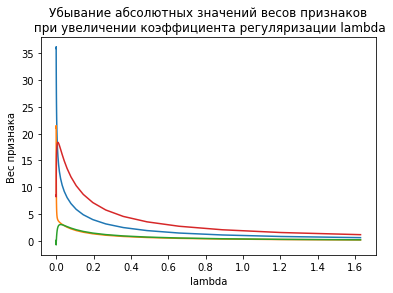

In [49]:
for i in range(4):
    plt.plot(lambda_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации lambda')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

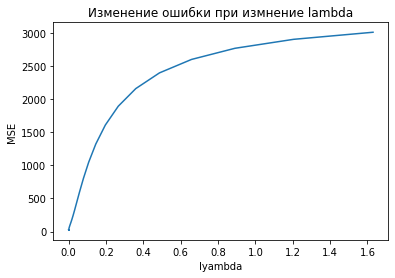

In [50]:

plt.plot(lambda_list, errors)
plt.title('Изменение ошибки при измнение lambda')
plt.xlabel('lyambda')
plt.ylabel('MSE');

In [51]:
W, MSE = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=2.5, log=True)

Iter: 0, weights: [1.1426416  0.84886739 0.27543148 0.84290467], error 3200.619833053082
Iter: 500, weights: [1.82242529e+100 8.07809655e+099 9.22497760e+099 3.84901809e+100], error 3.5580258666513903e+201
Iter: 1000, weights: [1.60743509e+201 7.12512915e+200 8.13671346e+200 3.39495219e+201], error inf
Iter: 1500, weights: [1.41780712e+302 6.28458276e+301 7.17683120e+301 2.99445211e+302], error inf
Iter: 2000, weights: [nan nan nan nan], error nan
Iter: 2500, weights: [nan nan nan nan], error nan
Iter: 3000, weights: [nan nan nan nan], error nan
Iter: 3500, weights: [nan nan nan nan], error nan
Iter: 4000, weights: [nan nan nan nan], error nan
Iter: 4500, weights: [nan nan nan nan], error nan
Final MSE: nan


####Выводы
Видно, что при увеличении $\lambda$ все веса стремятся к $0$, а ошибка непрерывно растет.


Еще интересно, что при увеличении $\lambda \leq 2,5$ алгоритм еще сходится. При более крупных значениях получатеся какой-то ад и получить значения вообше не получается. 
Особенно в проблеме не разбирался, но судя по всему необходимо использовать другие переменные.

### Задание № 2. 
Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

####Решение

Если верить [видосу](https://youtu.be/dHhYHGI9E6I)., то производная имеет вид:
$$d\lambda |w| = \lambda \cdot sign(w) ; w \ne 0$$

Не понял, что именно надо делать в случае если вес равен 0, но решил, что при нулевом весе ничего не поломается 


In [52]:

def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8, log=False):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки

#----------------- тут переделано под L1 -----------------------
        dReg = reg * np.sign(W) # градиент регуляризации
#----------------- до сюда ----------------------------------    
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0 and log == True:
            print(f'Iter: {i}, weights: {W}, error {err}')
      
    if log == True:
      print(f'Итоговая MSE: {calc_mse(y, np.dot(X, W))}')
    return W, err

In [53]:
W = gradient_descent_reg_l1(X_norm, y, iterations=5000, eta=1e-2, reg=1e-4, log = True)

Iter: 0, weights: [ 1.44425971 -0.03982015 -0.34615115  2.80664965], error 3208.6881948515015
Iter: 500, weights: [28.28851551  5.93238519 -1.18632225 15.36456275], error 39.9038882585301
Iter: 1000, weights: [32.27722566 10.04796551 -1.3786906  12.62121539], error 31.237458174940247
Iter: 1500, weights: [33.73718896 13.39681602 -0.95022176 11.15280335], error 28.02187833294837
Iter: 2000, weights: [34.52287971 15.83605909 -0.58839798 10.21128129], error 26.46777256497922
Iter: 2500, weights: [35.02532602 17.57291657 -0.3549308   9.57485618], error 25.699713440786372
Iter: 3000, weights: [35.36269855 18.80529235 -0.22164019  9.14012629], error 25.317601377561296
Iter: 3500, weights: [35.59095897 19.68095716 -0.1570142   8.84371259], error 25.1259099266447
Iter: 4000, weights: [35.74460373 20.3050957  -0.13736533  8.6428947 ], error 25.028541749378945
Iter: 4500, weights: [35.84689857 20.75178017 -0.1461762   8.50813982], error 24.978162772957887
Итоговая MSE: 24.951392918217312


In [54]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4, log = True)

Iter: 0, weights: [ 0.614768    0.73020738 -0.61847086  2.15588827], error 3409.089045693877
Iter: 500, weights: [22.5950857   5.24387785 -7.33785812 19.58866381], error 40.925741227969475
Iter: 1000, weights: [27.55295869  6.07847016 -6.1449071  16.78014506], error 33.84330742589547
Iter: 1500, weights: [31.15121918  6.18867547 -4.77774697 14.72565017], error 30.001223485678413
Iter: 2000, weights: [33.85347296  6.21735989 -3.69630886 13.18098313], error 27.81237852187811
Iter: 2500, weights: [35.89274027  6.233303   -2.87442605 12.01510751], error 26.56380514543299
Iter: 3000, weights: [37.43272667  6.24474405 -2.25316196 11.13465775], error 25.851505029448475
Iter: 3500, weights: [38.59578249  6.25332197 -1.78389635 10.46970682], error 25.445117424940378
Iter: 4000, weights: [39.47417761  6.25979384 -1.42947796  9.96750401], error 25.2132443145613
Iter: 4500, weights: [40.13758464  6.26468103 -1.16180313  9.58821583], error 25.080931350190987
Итоговая MSE: 25.00542040444543


####Вроде работает. 
Ради интереса можно сравнить с ранее написанной L2 - регуляризацией и аналитическим рассчетом

In [55]:
iterations=5000
eta=1e-2
reg=1e-4

W_L1_st, mse_L1_st = gradient_descent_reg_l1(X_st, y, iterations, eta, reg)
W_L2_st, mse_L2_st = gradient_descent_reg_l2(X_st, y, iterations, eta, reg)
W_L1_norm, mse_L1_norm = gradient_descent_reg_l1(X_norm, y, iterations, eta, reg)
W_L2_norm, mse_L2_norm = gradient_descent_reg_l2(X_norm, y, iterations, eta, reg)

print ('Аналитический рассчет весов')
print (f'Веса: W0={round(W_an[0],4)} W1={round(W_an[1],4)} W2={round(W_an[2],4)} W3={round(W_an[3],4)} Ошибка: {round(mse_an, 4)}')

print('Результаты после стандартизации X')
print (f'L1: W0={round(W_L1_st[0],4)} W1={round(W_L1_st[1],4)} W2={round(W_L1_st[2],4)} W3={round(W_L1_st[3],4)} Ошибка: {round(mse_L1_st, 4)}')
print (f'L2: W0={round(W_L2_st[0],4)} W1={round(W_L2_st[1],4)} W2={round(W_L2_st[2],4)} W3={round(W_L2_st[3],4)} Ошибка: {round(mse_L2_st, 4)}')

print ('Результаты после нормализации X')
print (f'L1: W0={round(W_L1_norm[0],4)} W1={round(W_L1_norm[1],4)} W2={round(W_L1_norm[2],4)} W3={round(W_L1_norm[3],4)} Ошибка: {round(mse_L1_norm, 4)}')
print (f'L2: W0={round(W_L2_norm[0],4)} W1={round(W_L2_norm[1],4)} W2={round(W_L2_norm[2],4)} W3={round(W_L2_norm[3],4)} Ошибка: {round(mse_L2_norm, 4)}')



Аналитический рассчет весов
Веса: W0=36.2275 W1=2.2285 W2=-0.0007 W3=8.4139 Ошибка: 24.9046
Результаты после стандартизации X
L1: W0=40.6264 W1=6.2683 W2=-0.9646 W3=9.3088 Ошибка: 25.007
L2: W0=37.5512 W1=6.0884 W2=-2.0029 W3=11.0207 Ошибка: 25.7988
Результаты после нормализации X
L1: W0=35.9404 W1=21.0389 W2=-0.069 W3=8.3891 Ошибка: 24.9548
L2: W0=34.7223 W1=18.6805 W2=-0.2359 W3=9.4571 Ошибка: 25.4744


При прочих равных видна разница во втором и третьем признаках. Скорее всего это из затого, что мы их нормализовывали и стандартизировали.

**TODO: Надо будет разобратсья какую погрешность вносят указанные операции, если вносят**

###Задание №3. 
*Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Судя по всему можно. Но вот смысл использовать различные механизмы масштабирования над одинм признаком вызывает соменения.

In [56]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())
#Норамализуем признак
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])

In [57]:
#Стандартизуем признак
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])

In [58]:
#Стандартизуем ранее нормализованный признак
X_norm_st = X_norm.copy()
X_norm_st[:, 1] = standart_scale(X_norm_st[:, 1])
X_norm_st[:, 2] = standart_scale(X_norm_st[:, 2])

In [59]:
#Нормализуем ранее стандартизованный призанк
X_st_norm = X_st.copy()
X_st_norm[:, 1] = min_max_scale(X_st_norm[:, 1])
X_st_norm[:, 2] = min_max_scale(X_st_norm[:, 2])

In [68]:
X_norm[:,1], X_st_norm[:,1]

(array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2]),
 array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2]))

Значения полученные после нормализации признака точно такие же как и значния после нормализации ранее стандартизированного признака

In [69]:
X_st[:,2], X_norm_st[:,2]

(array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735]),
 array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735]))

Получается, что значения после стандартизации признака точно такие же как и после стандартизации ранее нормализованного признака

На графике это все выглядит вот так

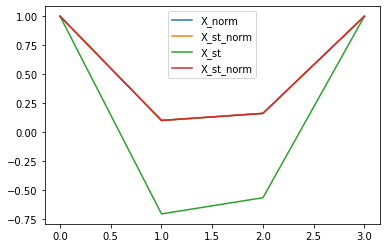

In [60]:
i = 1
plt.plot(X_norm[i], label = 'X_norm')
plt.plot(X_st_norm[i], label = 'X_st_norm')
plt.plot(X_st[i], label = 'X_st')
plt.plot(X_st_norm[i], label = 'X_st_norm')


plt.legend()

### Задание №4. 
Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [61]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4, log = False):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = np.zeros((iterations,1))
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors[i] = err
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0 and log == True:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print (f'Веса: W0={round(W[0],4)} W1={round(W[1],4)} W2={round(W[2],4)} W3={round(W[3],4)}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')

    return W, errors

In [62]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4, log = False):
#---------генерим начальные веса
    W = np.random.randn(X.shape[1])

    n = X.shape[0]
    errors = np.zeros((iterations,1))    

    for i in range(0, iterations):
        # генерируем случайный индекс объекта выборк
        idx = np.random.randint(X.shape[0], size=1)

        y_pred = np.dot(X[idx], W)
        err = calc_mse(y[idx], y_pred)
        dQ = 2/n * X[idx].T @ (y_pred - y[idx]) # градиент функции ошибки
        W -= (eta * dQ)

##-------------------------тут добавил рассчет общей ошибки---------------------
        errors[i] = calc_mse(y, np.dot(X, W))
#--------------------------вот до сюда---------------------------------------


        if i % (iterations / 10) == 0 and log == True:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Веса: W0={round(W[0],4)} W1={round(W[1],4)} W2={round(W[2],4)} W3={round(W[3],4)}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors

In [63]:
W = np.random.randn(X.shape[1])
W

array([0.07787434, 0.47161933, 0.82200159, 0.27460287])

In [64]:
# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=1000, n_features=4, n_informative=4, n_targets=1, 
                                      noise=4, coef=True, random_state=2)
display(X, coef)



array([[ 1.24925579e+00,  7.07212456e-02,  1.20681107e+00,
        -4.64958307e-01],
       [-1.10835167e+00, -9.71332206e-01, -5.90090600e-01,
         9.90152682e-01],
       [ 2.88741056e-03, -5.36743869e-01, -2.99676160e+00,
        -1.23253914e+00],
       ...,
       [-2.01348046e-01, -1.45522308e+00, -8.42590683e-01,
        -5.44031799e-02],
       [-2.78885368e-01, -2.12077334e+00, -6.75848505e-01,
        -1.32161204e+00],
       [ 4.79509962e-01,  1.10741640e+00,  1.59185865e+00,
        -1.92939070e+00]])

array([34.97278679, 75.03686389, 71.61510299, 34.65254101])

In [65]:
from sklearn.linear_model import LinearRegression

# создадим модель
lr= LinearRegression()

# обучим ее
lr.fit(X, y)

print(f'y = {round(lr.intercept_, 4)} + {round(lr.coef_[0], 4)}*x0 + {round(lr.coef_[1],4)}*x1 + {round(lr.coef_[2],4)}*x2 + {round(lr.coef_[3],4)}*x3  ')

y = -0.1015 + 35.1242*x0 + 75.0393*x1 + 71.6843*x2 + 34.7992*x3  


In [66]:
%time
iterations = 120000
W_GD, err_GD = gradient_descent(X, y, iterations, eta=1e-2)
W_SGD, err_SGD = stohastic_gradient_descent(X, y, iterations, eta=1e-2, batch_size=1)
#W_SGD, err_SGD_bch_2 = stohastic_gradient_descent(X, y, iterations, eta=1e-2, batch_size=2)

#err_SGD

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Веса: W0=35.1189 W1=75.038 W2=71.6903 W3=34.8084
Final MSE: 15.49335643460951
Веса: W0=32.3073 W1=69.4102 W2=64.8714 W3=32.4658
Final MSE: 108.94236625686975


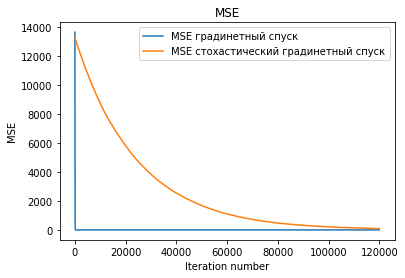

In [67]:
# Визуализируем изменение функционала ошибки
plt.plot(err_GD, label="MSE градинетный спуск")
plt.plot(err_SGD, label="MSE стохастический градинетный спуск")
#plt.plot(err_SGD_bch_2, label="MSE стохастический градинетный спуск batch_size=2")

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

#### Выводы
Из полученных данных и графика видно:
1. Что я слабо умею в графики
2. Алгоритм классического градиентного спуска при прочих равных сходится быстрее
3. Странно, что в СГС не скачет ошибка как на картинках в теории, возможно ошбика в реализации алгоритм. 


Проект: 
1. https://www.kaggle.com/c/regression-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/classification-choose-tutors классификация

## Литература

1. [Стохастический градиентный спуск](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)
2. [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
3. [numpy.mean](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html)
4. [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
5. [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
6. [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

## Summary

_Масштабирование_
* Масштабирование признаков - хорошая практика, позволяющая обучать модели быстрее и делающая их более точными
* При использовании метрических алгоритмов масштабирование обязательно (!)

_Стохастический градиентный спуск_
* Стохастический градиентный спуск (SGD) - на каждом шаге уменьшаем ошибку только на одном объекте (или нескольких), а не на всей выборке, работает быстрее обычного GD, т.к. меньше вычислений
* SGD из-за стохастичности может "перепрыгнуть" локальный минимум и попасть в глобальный

_Регуляризация_
* Переобучение - модель "выучила" выборку, но обобщающая способность слабая
* Признаки переобучения: качество на трейне высокое, а на тесте низкое, большие веса модели
* Один из способов борьбы с переобучением - регуляризация - штраф за большие веса

### Опеределения
*Масштабирование данных*

**Нормализация данных** — метод предобработки числовых признаков в обучающих наборах данных с целью приведения их к некоторой общей шкале без потери информации о различии диапазонов. (шкала от 0 до 1)

**Стандартизация** — метод предобработки с целью приведения данных к единому формату и представлению. (М=0, std=1)
___________
_Стохастический градиентный спуск_

**Стохастический градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента, который считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента.

___________
_Переобучение_

**Переобучение** (overfitting) — явление, когда алгоритм хорошо объясняет примеры из обучающей выборки (обеспечивает малую величину ошибки), но плохо работает на примерах, не участвовавших в обучении (не обеспечивает малую величину ошибки).

**Недообучение** (underfitting) — явление, при котором алгоритм обучения не обеспечивает достаточно малой величины средней ошибки на обучающей выборке.

**Кросс-валидация** — процедура оценивания обобщающей способности алгоритмов. С её помощью эмулируется наличие тестовой выборки, которая не участвует в обучении, но для которой известны правильные ответы.

________
_Регуляризация_

**Регуляризация** — метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Эта информация часто имеет вид штрафа за сложность модели.
$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

**L1-регуляризация** (lasso, регуляризация через манхэттенское расстояние) — метод добавления дополнительных ограничений в виде $L_{1}$-норму вектора весов, то есть сумму модулей весов. 
$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

**L2-регуляризация** (ridge, регуляризация Тихонова) — метод добавления дополнительных ограничений в виде $L_{2}$-норму вектора весов, то есть сумму квадратов весов. 
$$||w||_{2} = \sum^{d}_{j=1}w^{2}.$$

